In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1️⃣ Load and prepare the data
# ------------------------------
df = pd.read_csv("air_quality.csv")   # change path if needed
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['City', 'Date'])

In [3]:
# Display structure
print("Data Columns:", df.columns)
print(df.head())

Data Columns: Index(['Date', 'City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity'],
      dtype='object')
         Date       City   PM2.5    PM10    NO2    SO2    CO      O3  \
4  2023-01-01  Bangalore   72.13  332.30  34.48  30.73  0.53  105.66   
9  2023-01-02  Bangalore  221.18  221.30  53.88   7.33  0.26   57.34   
14 2023-01-03  Bangalore   79.09  296.95  57.92  32.96  1.96   31.61   
19 2023-01-04  Bangalore  108.63   61.88  69.74  40.27  0.77  104.37   
24 2023-01-05  Bangalore  153.14  380.49  47.69   7.55  2.05  112.32   

    Temperature  Humidity  
4          18.9      44.5  
9          21.3      34.6  
14         26.4      55.3  
19         17.2      72.3  
24         17.3      62.3  


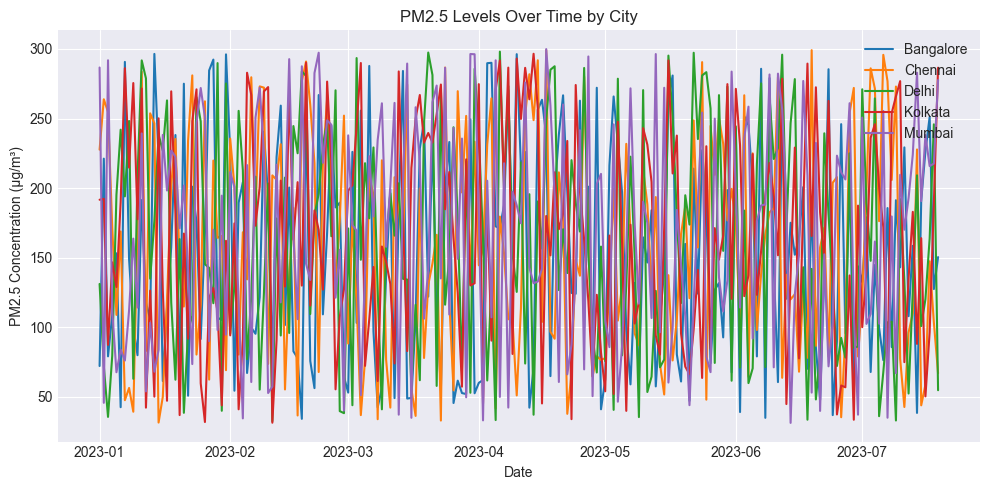

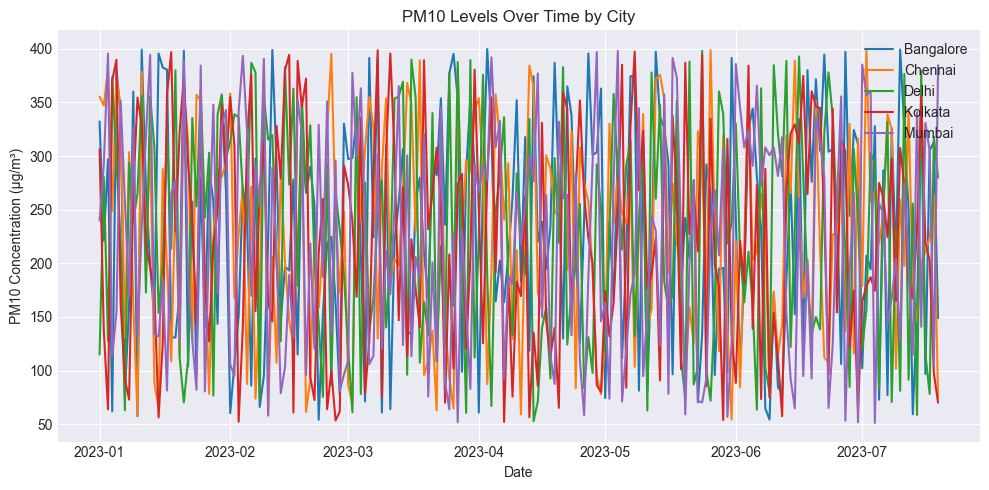

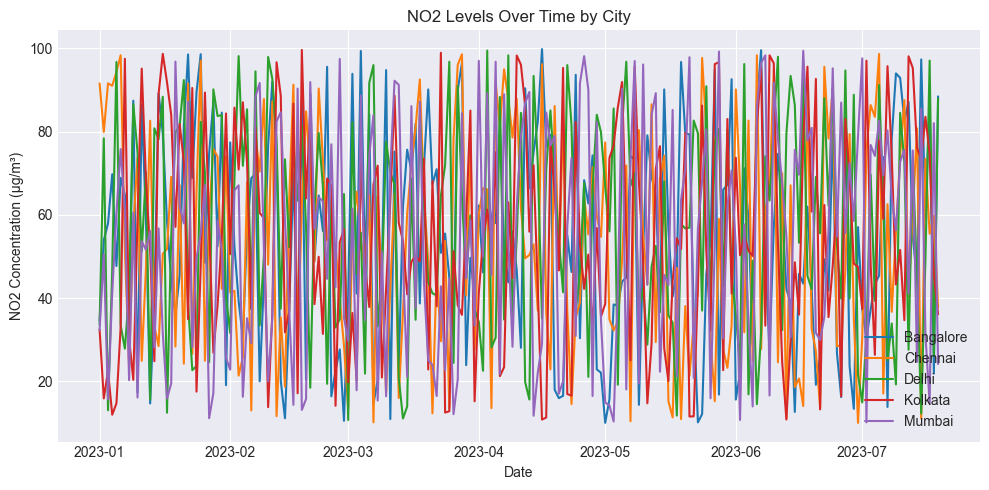

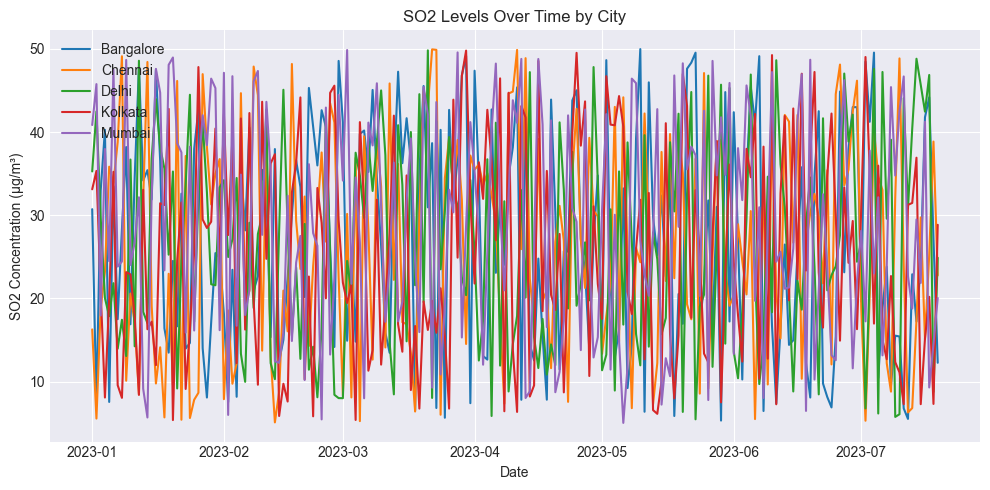

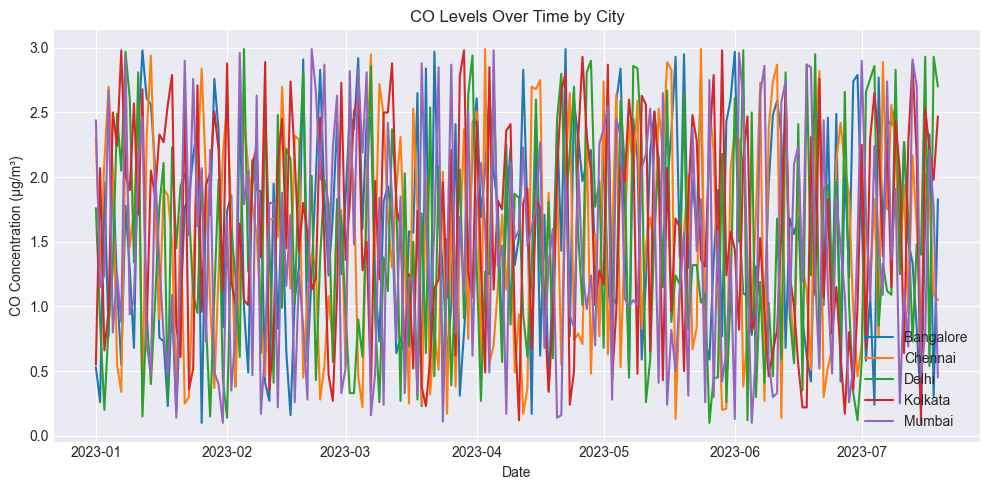

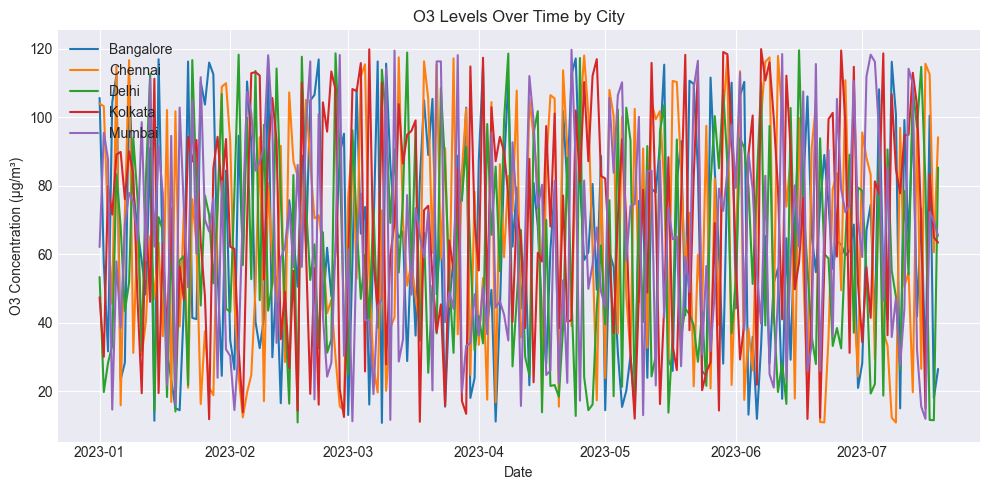

In [4]:
# 2️⃣ Plot pollutant trends by city
# ------------------------------
plt.style.use('seaborn-v0_8-darkgrid')
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

for pollutant in pollutants:
    plt.figure(figsize=(10, 5))
    for city in df['City'].unique():
        city_data = df[df['City'] == city]
        plt.plot(city_data['Date'], city_data[pollutant], label=city)
    plt.title(f"{pollutant} Levels Over Time by City")
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant} Concentration (µg/m³)")
    plt.legend()
    plt.tight_layout()
    plt.show()

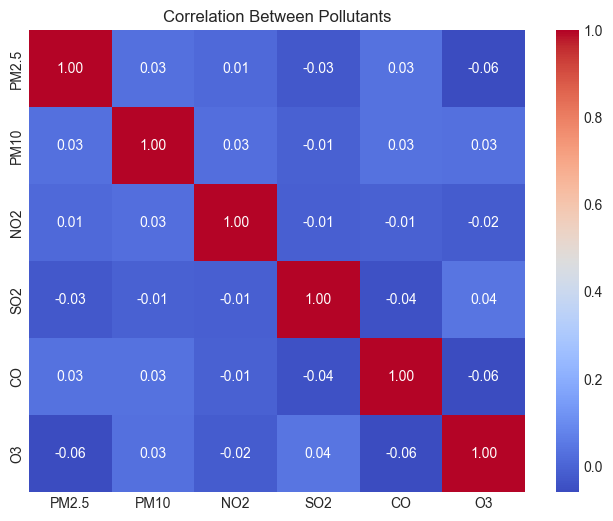

In [5]:
# 3️⃣ Correlation heatmap
# ------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pollutants")
plt.show()

<Figure size 1000x600 with 0 Axes>

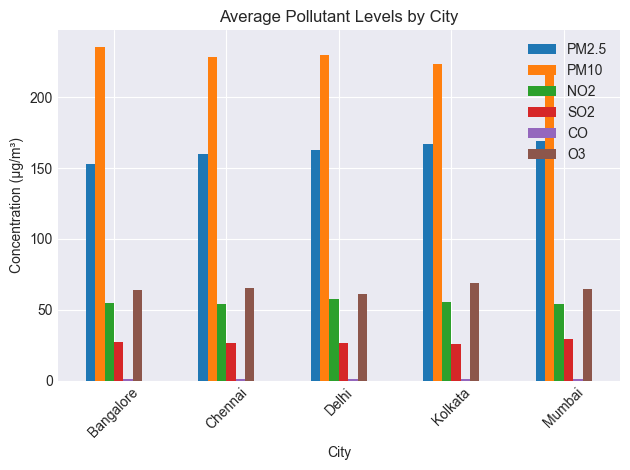

In [6]:
# 4️⃣ Average pollutant levels per city
# ------------------------------
avg_city = df.groupby("City")[pollutants].mean().reset_index()

plt.figure(figsize=(10,6))
avg_city.set_index("City").plot(kind="bar")
plt.title("Average Pollutant Levels by City")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# 5️⃣ Basic AQI categorization (based on PM2.5)
# ------------------------------
def categorize_aqi(pm25):
    if pm25 <= 50:
        return "Good"
    elif pm25 <= 100:
        return "Moderate"
    elif pm25 <= 200:
        return "Unhealthy"
    elif pm25 <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

df["AQI_Category"] = df["PM2.5"].apply(categorize_aqi)

C:\Users\sindh\AppData\Local\Temp\ipykernel_17668\1542536514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AQI_Category", order=["Good","Moderate","Unhealthy","Very Unhealthy","Hazardous"], palette="viridis")


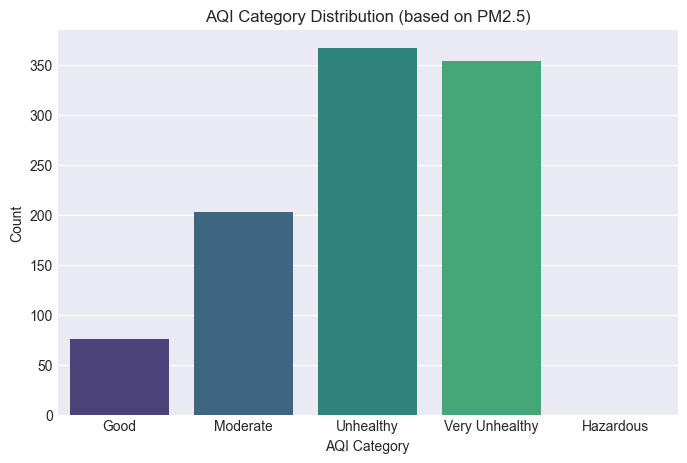

In [8]:
# AQI Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="AQI_Category", order=["Good","Moderate","Unhealthy","Very Unhealthy","Hazardous"], palette="viridis")
plt.title("AQI Category Distribution (based on PM2.5)")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

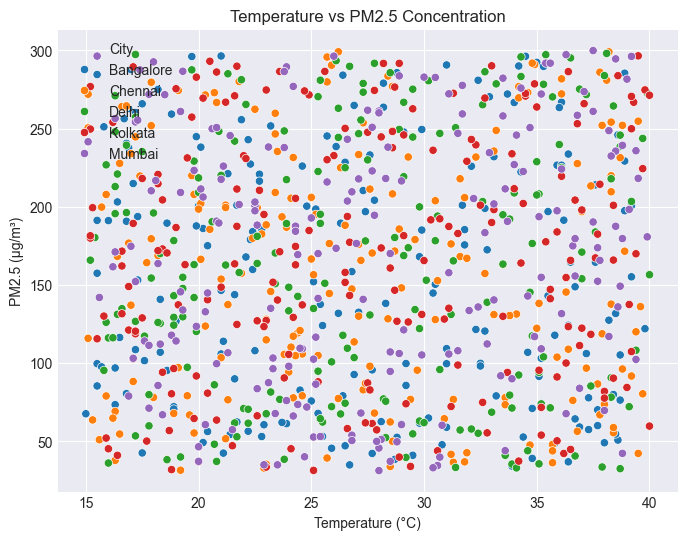

In [9]:
# 6️⃣ Optional: Temperature vs Pollution
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Temperature", y="PM2.5", hue="City", palette="tab10")
plt.title("Temperature vs PM2.5 Concentration")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()